# Gender Gap Analysis in Data Science and Machine Learning

## Environment Setup

In [1]:
### Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## Data Import

In [2]:
# Load Raw Data
df_raw = pd.read_csv("data/raw/kaggle_survey_2022_responses.csv", low_memory=False)

### Data inspect
The dataset is inspected using basic methods such as .info(), .shape, and .head() to understand the structure, size, and preview the content. This step helps identify any initial anomalies and informs the following cleaning steps.

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


In [4]:
df_raw.shape

(23998, 296)

In [5]:
df_raw.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


### Export survey questions and choices
Survey questions and choices embedded in the dataset’s first rows are extracted and saved as a separate CSV file for documentation purposes. These are removed from the working dataset to avoid interference with analysis.

In [6]:
# Extract and save the survey questions and choices for reference
survey_questions = df_raw.iloc[0]
survey_full_text = "data/supplementary/survey_questions_full_text.csv"
survey_questions.to_csv(survey_full_text, index=True)

## Data Cleaning and Preprocessing
Steps include removing duplicate rows, standardizing column names, handling missing critical values, and normalizing categorical gender responses. A clean dataset including all gender responses is created (`df_clean`). A focused subset containing only Man, Woman, and Nonbinary categories is derived (`df_gender`) for subsequent analysis.
Obs: Missing values (NaN) are expected in multiple choice questions (all Qn_x)

A summary comparison of original, cleaned, and filtered dataset shapes is included to track data reduction and cleaning effects.

### Clean survey data

In [7]:
# Make a copy of the raw data without first row
df_clean = df_raw[1:].copy()

# Drop first column with survey response duration
df_clean.drop(columns=["Duration (in seconds)"], inplace=True)

# Drop duplicates
df_clean.drop_duplicates(inplace=True)

# Rename columns to lowercase and replace spaces with underscores for consistency
df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')

# Remove rows with missing gender or salary information
df_clean = df_clean.dropna(subset=['q3', 'q29'])

# Map gender responses to consistent categories
gender_map = {
    'man': 'Man',
    'woman': 'Woman',
    'non-binary': 'Nonbinary',
    'nonbinary': 'Nonbinary',
}

# Normalize the gender column, which is 'q3' in this survey
df_clean['q3'] = df_clean['q3'].str.lower().map(gender_map)

# Create the main subset with only Man, Woman, Nonbinary for focused analysis
df_gender = df_clean[df_clean['q3'].isin(['Man', 'Woman', 'Nonbinary'])].copy()

# Show data summary
print(f'Raw data shape: {df_raw.shape}')
print(f'Clean data shape: {df_clean.shape}')
print(f'Gender-focused data shape: {df_gender.shape}')

Raw data shape: (23998, 296)
Clean data shape: (8136, 295)
Gender-focused data shape: (8039, 295)


### Export clean datasets

In [8]:
# Export Clean dataset
df_clean_export = "data/processed/responses_clean.csv"
df_clean.to_csv(df_clean_export, index=True)

# Export Clean and filtered Gender dataset
df_gender_export = "data/processed/responses_clean_gender.csv"
df_gender.to_csv(df_gender_export, index=True)

## Exploratory Data Analysis (EDA)

This section explores the cleaned dataset through univariate and bivariate analysis, complemented by insights derived from SQL queries. The analysis investigates demographic distributions, educational attainment by gender, age ranges, salary disparities, and job roles, utilizing visualizations and statistical testing for comprehensive understanding.

**Key business questions:**
- What is the gender distribution among respondents?  
- Which countries have the highest representation of data science professionals?  
- Is there a difference in the level of education among different genders?  
- How does age distribution vary by gender?  
- What is the gender pay gap in data science and machine learning professions?  
- How are job titles distributed across genders?  
 

### Univariate Analysis

#### Top 15 countries of residence
- Geographic Coverage: The survey collected responses from 56 distinct countries/territories, excluding the aggregated "Other" category and any undisclosed locations.
- Respondent Concentration: The participant base is heavily concentrated, with India (8,792 respondents, 36.64%) and the United States of America (2,920 respondents, 12.17%) together accounting for 48.81% of all survey responses.
- Data Aggregation: Consistent with the survey's methodology, countries with fewer than 50 respondents were grouped into an "Other" category (1,430 respondents, 5.96%) for de-identification purposes.
- European Representation: European Union countries show limited participation. France, with 262 respondents (1.09%), is the highest-ranking EU nation among the top 15, placed 15th overall.
- Methodological Bias: The survey's distribution likely introduces a sampling bias. This approach tends to overrepresent regions with high Kaggle community engagement, suggesting that these results may not be generalizable to broader global populations or market distributions, particularly for underrepresented regions like the EU.

![image.png](attachment:image.png)

#### Gender distribution
- The gender distribution: Man around 76%, Woman around 22%, Nonbinary and Self-describe around 0.5%
- Although highly disporportional, this gender representation is in line with global industry trends, that shows a range of 22%-26% for women in AI/ML/Data Science roles globally. Thus, we can consider the analysis as a reflection of the global situation regarding the gender distribution. 
- Important reminder: the same is not valid for region distribution.
- (sources: https://www.weforum.org/publications/gender-parity-in-the-intelligent-age-2025/, https://www.pwc.com/gx/en/about/inclusion/gender-equity/ai-accelerating-womens-inclusion-workplace.html, https://www2.deloitte.com/content/dam/Deloitte/us/Documents/consulting/us-ai-institute-women-in-data-careers.pdf)
- Since we can't know the gender of those who "Prefer not to say" and those who "Self-describe", I removed them from the further analyis.

![image.png](attachment:image.png)

## Visualization

In [ ]:
#read the sql queries responses to create visualizations:
country_per = pd.read_csv("data/outputs/sql_outputs/country-total.csv")
edu_per = pd.read_csv("data/outputs/sql_outputs/education-gender.csv")
gender_per = pd.read_csv("data/outputs/sql_outputs/gender.csv")

### Gender Distribution

In [ ]:
#Gender distribution
labels = gender_per['Gender']
sizes = gender_per['Percentage']
plt.pie(sizes,)
legend_labels = [f'{l} ({s:.1f}%)' for l, s in zip(labels, sizes)]
plt.legend(legend_labels,
           title="Gender",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Gender Distribution of Survey Respondents', fontsize=14)
plt.tight_layout()
plt.show()

### Country Distribution

In [ ]:
#Country distribution
country_per
country_per.dtypes
plt.figure(figsize=(10, 12))
ax = sns.barplot(
    x='Total respondents',
    y='Country',
    data=country_per,
    palette='viridis',
    legend=False)

# Add title and labels
plt.title('Distribution of Respondents by Country', fontsize=12)
plt.xlabel('Total Respondents', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Educational level by Gender
Is there a difference in the level of education among different genders?
- Consistent Foundational Degrees: The most common educational levels across all gender groups are Master's and Bachelor's degrees, showing consistency in proportions:
Master's Degree: Men (39.1%), Women (39.22%), Nonbinary (36.36%)
Bachelor's Degree: Men (33.08%), Women (31.25%), Nonbinary (32.47%)

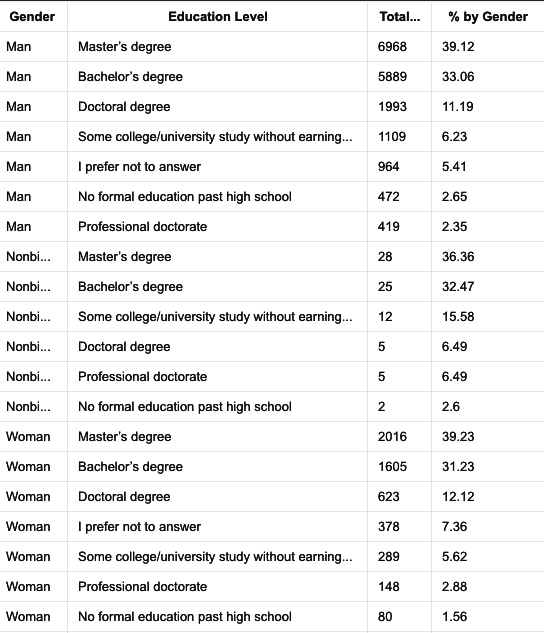

In [ ]:
edu_per #SQL query return

In [ ]:
#Education level by gender
education_order = [
    'Doctoral degree',
    'Professional doctorate',
    'Master’s degree',
    'Bachelor’s degree',
    'Some college/university study without earning a bachelor’s degree',
    'No formal education past high school',
    'I prefer not to answer']

edu_per['Education Level'] = pd.Categorical(
    edu_per['Education Level'],
    categories=education_order,
    ordered=True)

gender_order = ['Woman', 'Man', 'Nonbinary']

plt.figure(figsize=(14, 8)) 
ax = sns.barplot(
    x='Education Level',
    y='% by Gender',
    hue='Gender',
    hue_order=gender_order,
    data=edu_per,
    palette='husl')

plt.title('Educational Level by Gender', fontsize=18)
plt.xlabel('Highest Education Level', fontsize=14)
plt.ylabel('Respondents within Gender Group (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
       
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()        

#### Age range distribution by Gender

In [ ]:
#Age by gender
print(dfg['Q2'].unique().tolist())
age_order = ['30-34', '18-21', '55-59', '45-49', '70+', '22-24', '35-39','40-44', '50-54', '25-29', '60-69']
age_order.sort()
dfg.loc[:, 'Q2'] = pd.Categorical(dfg['Q2'], categories=age_order, ordered=True)
print(age_order)

In [ ]:
#Age by gender - plot

#Age by gender
print(dfg['Q2'].unique().tolist())
age_order = ['30-34', '18-21', '55-59', '45-49', '70+', '22-24', '35-39','40-44', '50-54', '25-29', '60-69']
age_order.sort()
dfg.loc[:, 'Q2'] = pd.Categorical(dfg['Q2'], categories=age_order, ordered=True)
print(age_order)

#Define the order for age and gender
gender_order = ['Woman', 'Man', 'Nonbinary']
plt.figure(figsize=(14, 8)) 

ax = sns.countplot(
    x= 'Q2',
    hue='Q3',
    hue_order=gender_order,
    data=dfg,
    palette='husl',
    order=age_order
)

plt.title('Age range by Gender', fontsize=18)
plt.xlabel('Age range', fontsize=14)
plt.ylabel('Total respondents', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
       
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()     

In [ ]:
#Age range in percentage
# Calculate proportions within each Q2 group
gender_age_proportions = dfg.groupby('Q2')['Q3'].value_counts(normalize=True).unstack(fill_value=0,)

plt.figure(figsize=(14, 8))
# Ensure the order of hues
gender_age_proportions.loc[:, gender_order].plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

plt.title('Proportion of Gender within Each Age Range', fontsize=18)
plt.xlabel('Age range', fontsize=12)
plt.ylabel('Proportion of Respondents', fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Filter the DataFrame for 'Nonbinary' respondents only
dfg_nonbinary = dfg[dfg['Q3'] == 'Nonbinary'].copy()

#Correct order by age
dfg_nonbinary.loc[:, 'Q2'] = pd.Categorical(dfg_nonbinary['Q2'], categories=age_order, ordered=True)

# Create the plot for Nonbinary
plt.figure(figsize=(10, 6))
sns.countplot(data=dfg_nonbinary, x='Q2', palette='viridis', order=age_order)

plt.title('Age Range Distribution for Nonbinary Respondents', fontsize=16)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
#Students / Professionals by Gender
# Create a new column 'Q5_label' in dfg
dfg.loc[dfg['Q5'] == 'Yes', 'Q5_label'] = 'Student'
dfg.loc[dfg['Q5'] == 'No', 'Q5_label'] = 'Professional'
# Calculate proportions within each Q5 group
student_prop = dfg.groupby('Q3')['Q5_label'].value_counts(normalize=True).unstack(fill_value=0)

plt.figure(figsize=(8, 6)) 

ax = student_prop.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')

plt.title('Students & Professionals by Gender', fontsize=18)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Proportion of Respondents', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(y=0.5, color='grey', linestyle='--', label='50% Mark')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()  

#### Gender pay gap
Is there a pay gap among gender? 
This question was asked only to respondents who are not students (Q5 = "No") and are not unemployed (Q23 != "unemployed")

#### New subset: clean salary range [Q29]: only professionals [Q5] and employed [Q23]
1. Filter out the students and unemployed
2. Check for missing values after that

In [ ]:
dfg_filt = dfg[(dfg['Q5'] == 'No') & (dfg['Q23'] != "unemployed")].copy()
dfg_filt.dropna(subset=['Q29'], inplace=True) #previous Length: 11833 -- new Lenght: 8039
dfg_salary = dfg_filt['Q29']
dfg_salary

In [ ]:
print(dfg_salary.unique())

In [ ]:
print(dfg_salary.nunique())

In [ ]:
salary_order = [
    '$0-999',
    '1,000-1,999',
    '2,000-2,999',
    '3,000-3,999',
    '4,000-4,999',
    '5,000-7,499',
    '7,500-9,999',
    '10,000-14,999',
    '15,000-19,999',
    '20,000-24,999',
    '25,000-29,999',
    '30,000-39,999',
    '40,000-49,999',
    '50,000-59,999',
    '60,000-69,999',
    '70,000-79,999',
    '80,000-89,999',
    '90,000-99,999',
    '100,000-124,999',
    '125,000-149,999',
    '150,000-199,999',
    '200,000-249,999',
    '250,000-299,999',
    '300,000-499,999',
    '$500,000-999,999',
    '>$1,000,000'
]

In [ ]:
#categorical count of salary range
plt.figure(figsize=(8, 10))
ax = sns.countplot(
    y='Q29',
    data=dfg_filt,
    palette='viridis',
    order=salary_order)

# Add title and labels
plt.title('Distribution of Respondents by Salary range', fontsize=16)
plt.xlabel('Total Respondents', fontsize=10)
plt.ylabel('Salary range', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Get the counts for each salary range
salary_counts = dfg_filt['Q29'].value_counts()

# Convert the Series to a DataFrame
salary_counts_df = salary_counts.reset_index()
salary_counts_df.columns = ['Salary Range', 'Total Respondents']

# Salary range - keep the order
salary_counts_df['Salary Range'] = pd.Categorical(
    salary_counts_df['Salary Range'],
    categories=salary_order,
    ordered=True)

salary_counts_df = salary_counts_df.sort_values('Salary Range')

# Export to CSV
salary_counts_df.to_csv('data/outputs/tables_graphs/salary_range_data.csv', index=False)

#### Convert salary range to midpoint
Midpoint = the average of each range. Ex: first range 0-999, midpoint is (0+999)/2=499.5

In [ ]:
def convert_salary_range_to_midpoint(salary_range):
    if pd.isna(salary_range):
        return np.nan
    
    salary_range = str(salary_range).replace('$', '').replace(',', '').strip()

    if '-' in salary_range:
        parts = salary_range.split('-')
        try:
            lower = float(parts[0])
            upper = float(parts[1])
            return (lower + upper) / 2
        except ValueError:
            return np.nan # Handle cases where parts are not valid numbers
    elif '+' in salary_range or '>' in salary_range:
        try:
            clean_num_str = (salary_range.replace('+', '').replace('>', ''))
            return float(clean_num_str)
        except ValueError:
            return np.nan
    else: # Handle single numbers if any, or like 'No income' if any
        try:
            return float(salary_range)
        except ValueError:
            return np.nan

In [ ]:
#apply function to filtered dataframe (without students and unemployed)
dfg_filt.loc[:, 'Q29_midpoint'] = dfg_filt['Q29'].apply(convert_salary_range_to_midpoint)
print(dfg_filt['Q29_midpoint'].head())
print(round(dfg_filt['Q29_midpoint'].describe()))
print(dfg_filt['Q29_midpoint'].unique())
print(dfg_filt['Q29_midpoint'].nunique())

#### Gender pay gap visualizations

In [ ]:
plt.figure(figsize=(10, 7))

# Create the box plot
ax = sns.boxplot(
    x='Q3',             # Categorical variable (Gender) on the x-axis
    y='Q29_midpoint',   # Numerical variable (Salary Midpoint) on the y-axis
    data=dfg_filt,      
    palette='pastel',   
    order=gender_order 
)

# Add title and labels
plt.title('Salary Midpoint Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Salary Midpoint ($)', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Statistics
print("\nMedian Salary Midpoint by Gender:")
print(dfg_filt.groupby('Q3')['Q29_midpoint'].median().sort_values(ascending=False))

print("\nMean Salary Midpoint by Gender:")
print(round(dfg_filt.groupby('Q3')['Q29_midpoint'].mean().sort_values(ascending=False),))

In [ ]:
median_salary_by_gender = dfg_filt.groupby('Q3')['Q29_midpoint'].median().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=median_salary_by_gender.index, # Genders on the x-axis
    y=median_salary_by_gender.values, # Median salaries on the y-axis
    palette='viridis'
)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Median Salary Midpoint by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Median Salary Midpoint ($)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Filter man and woman only
dfg_wm = dfg_filt[dfg_filt['Q3'].isin(['Man', 'Woman'])].copy()

#plot only man and woman

plt.figure(figsize=(10, 7))

# Create the box plot
ax = sns.boxplot(
    x='Q3',             # Categorical variable (Gender) on the x-axis
    y='Q29_midpoint',   # Numerical variable (Salary Midpoint) on the y-axis
    data=dfg_wm,      
    palette='pastel',   
    order=['Man', 'Woman']
)

# Add title and labels
plt.title('Salary Midpoint Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Salary Midpoint ($)', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Statistics
print("\nMedian Salary Midpoint by Gender:")
print(dfg_wm.groupby('Q3')['Q29_midpoint'].median().sort_values(ascending=False))

print("\nMean Salary Midpoint by Gender:")
print(round(dfg_wm.groupby('Q3')['Q29_midpoint'].mean().sort_values(ascending=False),))

In [ ]:
# Convert the Series to a DataFrame
median_salary_df = median_salary_by_gender.reset_index()

# Rename the columns for clarity in the CSV
median_salary_df.columns = ['Gender', 'Median Salary Midpoint']

# Export to CSV
median_salary_df.to_csv('data/outputs/tables_graphs/median_salary_by_gender.csv', index=False)

## Statistical Analysis
### Chi-square test

In [ ]:
from scipy.stats import chi2_contingency

#### Crosstable: Man, Woman, Nonbinary

In [ ]:
crosstab_paygap = pd.crosstab(dfg_filt['Q29'], dfg_filt['Q3'])
crosstab_paygap

In [ ]:
sns.heatmap(crosstab_paygap, annot=False, cmap="Reds", fmt="d")

#### Crosstab: only Man and Woman

In [ ]:
crosstab_paygap2 = pd.crosstab(dfg_wm['Q29'], dfg_wm['Q3'])

#### Chi-square test: gender x salary

In [ ]:
_, chi2_pvalue, _, _  = chi2_contingency(crosstab_paygap)
print(float(chi2_pvalue))
print(float(chi2_pvalue) < 0.05)

In [ ]:
_, chi2_pvalue, _, _  = chi2_contingency(crosstab_paygap2)
print(float(chi2_pvalue))
print(float(chi2_pvalue) < 0.05)

In [ ]:
sns.heatmap(crosstab_paygap2, annot=True, cmap="Reds", fmt="d", annot_kws={"fontsize": 8})

In [ ]:
#Show salary in asc order
crosstab_ordered = crosstab_paygap2.reindex(salary_order)
plt.figure(figsize=(4, 8))
sns.heatmap(crosstab_ordered, annot=True, cmap="Reds", fmt="d", annot_kws={"fontsize": 8})

#### Job title by gender

In [ ]:
crosstab_job2 = pd.crosstab(dfg_wm['Q23'], dfg_wm['Q3'])
crosstab_job2

In [ ]:
crosstab_job = pd.crosstab(dfg_filt['Q23'], dfg_filt['Q3'])
crosstab_job

In [ ]:
plt.figure(figsize=(4, 8))
sns.heatmap(crosstab_job, annot=True, cmap="Reds", fmt="d", annot_kws={"fontsize": 8})

In [ ]:
crosstab_job_prop = pd.crosstab(dfg_filt['Q23'], dfg_filt['Q3'], normalize='columns').reindex(columns=gender_order)

plt.figure(figsize=(4, 8))
sns.heatmap(crosstab_job_prop, annot=True, cmap="Blues", fmt=".1%", annot_kws={"fontsize": 8})
plt.xlabel('Gender', fontsize=8)
plt.ylabel('Job Status', fontsize=8)
plt.title('Job Status Proportions by Gender', fontsize=12)
plt.tight_layout()
plt.show()